In [7]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
#dependencies and setup 
import pandas as pd
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

# Import Flask
from flask import Flask, redirect, jsonify


In [9]:
 engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base() 

# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
 # Calculate the date 1 year ago from the last data point in the database
one_year_data = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_data

# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_data).\
    order_by(Measurement.date).all()


# Perform a query to retrieve the data and precipitation scores
scores_data = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data, columns=["Date","Precipitation"])
precipitation_df.set_index("Date", inplace=True,)
precipitation_df.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


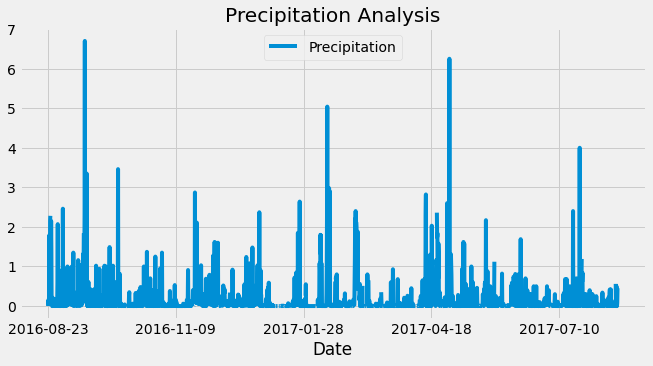

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title="Precipitation Analysis", figsize=(10,5))
plt.legend(loc='upper center')
plt.savefig("Images/precipitation.png")
plt.show()

In [ ]:
 # Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
 # Design a query to show how many stations are available in this dataset?

In [ ]:
 # What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [ ]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [ ]:
 # Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram